# PMT based Cosmic Rate measurement
This notebook does only use the event/flash trees

## Imports

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helpfunction as helper
from scipy.optimize import fsolve

In [2]:
%matplotlib inline

## Constants

In [3]:
main_tree_name = 'cosmicstudies'
flash_name = 'SimpleCosmicFlashes'

outdir = './Output/Paper/'

# Input file lists
file_name_mc = './input/corsika_p_sce_30k.root'
file_name_data = './input/extunbiased_run1.root'

mc_lab = 'CORSIKA'
data_lab = 'Cosmic data (Run 1)'

ub_tag = "MicroBooNE Data"

## Load the data

In [4]:
file_mc = uproot.open(file_name_mc)[main_tree_name]
file_data = uproot.open(file_name_data)[main_tree_name]

In [5]:
data_n = file_data['Event'].numentries
mc_n = file_mc['Event'].numentries
mc_scale = data_n/mc_n

In [6]:
df_flash_mc = file_mc[flash_name].pandas.df()
df_flash_data = file_data[flash_name].pandas.df()

21.36238255033557
28.25110466413747


Text(0.5, 0, 'Simple Beam Flash Time [$\\mu$s]')

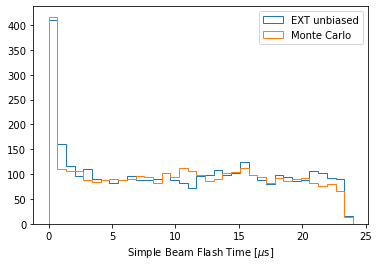

In [7]:
print(len(df_flash_mc)/mc_n)
print(len(df_flash_data)/data_n)
plt.hist(file_mc['SimpleBeamFlashes'].array('flash_time'), bins=35, range = (0,24), histtype = 'step', weights = [mc_scale]*file_mc['SimpleBeamFlashes'].numentries, label='EXT unbiased')
plt.hist(file_data['SimpleBeamFlashes'].array('flash_time')-0.38, bins=35, range = (0,24) , histtype = 'step', label = 'Monte Carlo')
plt.legend()
plt.xlabel(r"Simple Beam Flash Time [$\mu$s]")

In [8]:
df_flash_mc.head()

,event,run,subrun,num_mcp,dataset_prescale_factor,num_flashes,flash_time,flash_difftime,flash_totalPE,flash_z,flash_sz,flash_y,flash_sy,flash_width,flash_abstime,flash_num_PMT10percent
entry,,,,,,,,,,,,,,,,
0,961,1,49,16033,1.0,20,-1181.140625,-1181.140625,7332,754.082886,112.620819,-6.651336,37.799477,0.28125,2868.828125,0
1,961,1,49,16033,1.0,20,105.953125,1287.093750,4945,942.326233,39.553207,-37.866676,34.422676,0.28125,4155.921875,0
2,961,1,49,16033,1.0,20,1695.015625,1589.062500,3118,269.854980,67.235970,-15.085605,36.120304,0.28125,5744.984375,0
3,961,1,49,16033,1.0,20,-1854.171875,-3549.187500,2381,803.274841,82.745834,6.447587,41.323135,0.28125,2195.796875,0
4,961,1,49,16033,1.0,20,1180.890625,3035.062500,2283,577.950317,63.022446,-5.989821,38.084187,0.28125,5230.859375,0


In [9]:
data_num_flashes = file_data[b'Event'].array('num_simplecosmicflashes')
mc_num_flashes = file_mc[b'Event'].array('num_simplecosmicflashes')

In [10]:
len(data_num_flashes)

22405

## Plots

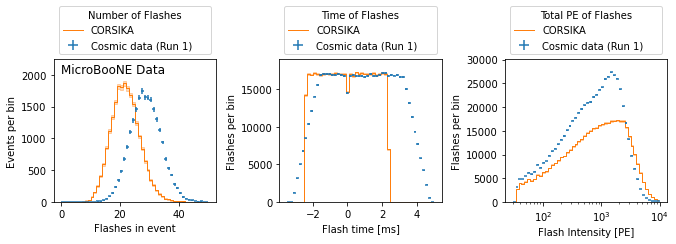

In [11]:
# number of flashes per event, PE of flashes, time of flashes
# data vs MC
# before and after timing cut

fig, ax = plt.subplots(ncols = 3, sharey=False, figsize=(9.5,3.5))
N=50

#Num flashes
x_min = 0
x_max = 50
data = [mc_num_flashes, data_num_flashes]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[0].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[0].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[0].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[0].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Number of Flashes', loc='lower center', mode='expand')
ax[0].set_ylim(0, max(max_y)*1.2)
ax[0].set_xlabel("Flashes in event")
ax[0].set_ylabel("Events per bin")
ax[0].text(0, ax[0].get_ylim()[1]*0.9, ub_tag, size=12)


#Time flashes
x_min = -3.5
x_max = 5
data = [df_flash_mc['flash_time']/1000, df_flash_data['flash_time']/1000]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[1].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[1].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[1].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[1].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Time of Flashes', loc='lower center', mode='expand')
ax[1].set_ylim(0, max(max_y)*1.1)
ax[1].set_ylabel('Flashes per bin')
ax[1].set_xlabel(r'Flash time [ms]')


#PE flashes
x_min = 30
x_max = 10000
data = [df_flash_mc['flash_totalPE'], df_flash_data['flash_totalPE']]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1], log=True)
ax[2].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[2].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[2].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[2].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Total PE of Flashes', loc='lower center', mode='expand')
ax[2].set_ylim(0, max(max_y)*1.1)
ax[2].set_ylabel('Flashes per bin')
ax[2].set_xlabel(r'Flash Intensity [PE]')
ax[2].set_xscale("log", nonposx='clip')

fig.tight_layout()
fig.savefig(outdir+"flash_beforetime.pdf", bbox_inches="tight")

In [12]:
df_flash_mc['flash_time'].describe()

count    636599.000000
mean        -50.082603
std        1389.103638
min       -2449.906250
25%       -1255.171875
50%         -60.578125
75%        1154.796875
max        2350.109375
Name: flash_time, dtype: float64

In [13]:
df_flash_mc['flash_totalPE'].describe()

count    636599.000000
mean       1289.021594
std        1420.497315
min          34.000000
25%         288.000000
50%         804.000000
75%        1854.000000
max       65242.000000
Name: flash_totalPE, dtype: float64

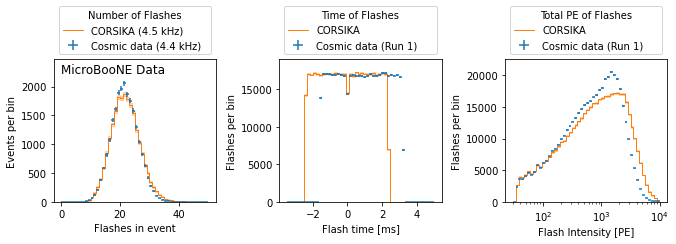

In [14]:
mc_bounds = [25,2350,-0,-2450]
time_query_mc= '((flash_time>@mc_bounds[0]) & (flash_time<@mc_bounds[1])) | \
                ((flash_time<@mc_bounds[2]) & (flash_time>@mc_bounds[3]))' 
time_mc = (4800-25)*1e-6

data_bounds = [25,3200,-0,-1600]
time_query_data= '((flash_time>@data_bounds[0]) & (flash_time<@data_bounds[1])) | \
                  ((flash_time<@data_bounds[2]) & (flash_time>@data_bounds[3]))'
time_data = (4800-25)*1e-6

df_flash_mc_time = df_flash_mc.query(time_query_mc)
df_flash_data_time = df_flash_data.query(time_query_data)
mc_rate = len(df_flash_mc_time)/(mc_n*time_mc)/1000
data_rate = len(df_flash_data_time)/(data_n*time_data)/1000
num_flash_mc = df_flash_mc_time.groupby(['run', 'subrun', 'event', 'num_mcp']).size()
num_flash_data = df_flash_data_time.groupby(['run', 'subrun', 'event']).size()

fig, ax = plt.subplots(ncols = 3, sharey=False, figsize=(9.5,3.5))
N=50

#Num flashes
x_min = 0
x_max = 50
data = [num_flash_mc, num_flash_data]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[0].step(edges_mid, bins[0], lw=1, label=mc_lab+' ({0:.1f} kHz)'.format(mc_rate), where='mid', color='C1')
ax[0].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[0].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label='Cosmic data ({0:.1f} kHz)'.format(data_rate))
ax[0].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Number of Flashes', loc='lower center', mode='expand')
ax[0].set_ylim(0, max(max_y)*1.2)
ax[0].set_xlabel("Flashes in event")
ax[0].set_ylabel("Events per bin")
ax[0].text(0, ax[0].get_ylim()[1]*0.9, ub_tag, size=12)


#Time flashes
x_min = -3.5
x_max = 5
data = [df_flash_mc_time['flash_time']/1000, df_flash_data_time['flash_time']/1000]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[1].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[1].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[1].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[1].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Time of Flashes', loc='lower center', mode='expand')
ax[1].set_ylim(0, max(max_y)*1.1)
ax[1].set_ylabel('Flashes per bin')
ax[1].set_xlabel(r'Flash time [ms]')


#PE flashes
x_min = 30
x_max = 10000
data = [df_flash_mc_time['flash_totalPE'], df_flash_data_time['flash_totalPE']]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1], log=True)
ax[2].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[2].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[2].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[2].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Total PE of Flashes', loc='lower center', mode='expand')
ax[2].set_ylim(0, max(max_y)*1.1)
ax[2].set_ylabel('Flashes per bin')
ax[2].set_xlabel(r'Flash Intensity [PE]')
ax[2].set_xscale("log", nonposx='clip')

fig.tight_layout()
fig.savefig(outdir+"flash_aftertime.pdf", bbox_inches="tight")

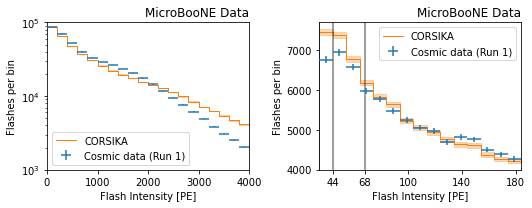

In [15]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(7.5,3))


#PE flashes
N=20
x_min = 0
x_max = 4000
edges, edges_mid, bins_mc,   err_mc  , _ = helper.histHelper(N, x_min, x_max, [df_flash_mc_time['flash_totalPE']], weights=[mc_scale], where='post')
_    , _        , bins_data, err_data, _ = helper.histHelper(N, x_min, x_max, [df_flash_data_time['flash_totalPE']], weights=[1], where='mid')
bins = [bins_mc[0], bins_data[0]]
err = [err_mc[0], err_data[0]]

ax[0].step(edges, bins[0], lw=1, label=mc_lab, where='post', color='C1')
ax[0].fill_between(edges, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='post', color='C1')
ax[0].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[0].legend(loc='lower left')
ax[0].set_yscale("log")
ax[0].set_xlabel('Flash Intensity [PE]')
ax[0].set_ylabel('Flashes per bin')
ax[0].set_xlim(x_min,x_max)
ax[0].set_ylim(1e3,1e5)
ax[0].set_title(ub_tag, loc='right')

N=16
x_min = 34
x_max = 194
edges, edges_mid, bins_mc,   err_mc  , _ = helper.histHelper(N, x_min, x_max, [df_flash_mc_time['flash_totalPE']], weights=[mc_scale], where='post')
_    , _        , bins_data, err_data, _ = helper.histHelper(N, x_min, x_max, [df_flash_data_time['flash_totalPE']], weights=[1], where='mid')
bins = [bins_mc[0], bins_data[0]]
err = [err_mc[0], err_data[0]]

ax[1].step(edges, bins[0], lw=1, label=mc_lab, where='post', color='C1')
ax[1].fill_between(edges, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='post', color='C1')

ax[1].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Flash Intensity [PE]')
ax[1].set_ylabel('Flashes per bin')
ax[1].set_xlim(x_min,x_max-10)
ax[1].set_title(ub_tag, loc='right')
ax[1].set_xticks([44,68,100,140,180])

ax[1].axvline(x=34)
ax[1].axvline(x=44.2, color='k', alpha=0.5)
ax[1].axvline(x=68, color='k', alpha=0.5)

fig.tight_layout()
fig.savefig(outdir+"flash_PE.pdf", bbox_inches="tight")



In [16]:
plt.plot(edges[:-1], bins[1]/bins[0])
plt.show()

ValueError: operands could not be broadcast together with shapes (16,) (17,) 

In [17]:
# Check if the thresholds are the same
assert(min(df_flash_mc_time['flash_totalPE'])==min(df_flash_data_time['flash_totalPE']))
pe_threshold = min(df_flash_mc_time['flash_totalPE'])
print("Flash reconstruction threshold:", pe_threshold)
syst_pe = 1.3*pe_threshold
syst_high_therhold = 2*pe_threshold

print("Data/MC-ratio before dead time correction: \t",data_rate/mc_rate)
mc_ratio_lightyield_syst = (sum(df_flash_data_time['flash_totalPE']>syst_pe)/(data_n*time_data))/(len(df_flash_mc_time)/(mc_n*time_mc))
print("Data/MC-ratio (MC ly +30%): \t", mc_ratio_lightyield_syst)
mc_ratio_lightyield_syst = (len(df_flash_data_time)/(data_n*time_data))/(sum(df_flash_mc_time['flash_totalPE']>syst_pe)/(mc_n*time_mc))
print("Data/MC-ratio (MC ly -30%): \t", mc_ratio_lightyield_syst)
mc_ratio_lightyield_syst = (sum(df_flash_data_time['flash_totalPE']>syst_high_therhold)/(data_n*time_data))/(sum(df_flash_mc_time['flash_totalPE']>syst_high_therhold)/(mc_n*time_mc))
print("Data/MC-ratio (higher theshold): \t", mc_ratio_lightyield_syst)

Flash reconstruction threshold: 34
Data/MC-ratio before dead time correction: 	 0.9899283077535659
Data/MC-ratio (MC ly +30%): 	 0.9744217823057458
Data/MC-ratio (MC ly -30%): 	 1.0073346008538262
Data/MC-ratio (higher theshold): 	 0.9926027075826366


In [18]:
print(mc_rate, 1/np.sqrt(mc_rate*1000*mc_n*time_mc)*mc_rate)
print(data_rate, 1/np.sqrt(data_rate*1000*data_n*time_data)*data_rate)

4.472110755824168 0.005606107939263312
4.427069032599539 0.006432784237972944


In [19]:
# Correct for 8us dead time after each flash!
func = lambda x : R - x*np.exp(-8e-6*x)
a_initial_guess = 5000

R= mc_rate*1000
mc_rate_corr = fsolve(func, a_initial_guess)[0]
R= data_rate*1000
data_rate_corr = fsolve(func, a_initial_guess)[0]

mc_err = 1/np.sqrt(mc_rate*1000*mc_n*time_mc)*mc_rate_corr
data_err = 1/np.sqrt(data_rate*1000*data_n*time_data)*data_rate_corr
print('\nMC: {0:0.0f}+-{1:0.0f}'.format(mc_rate_corr, mc_err))
print('Data: {0:0.0f}+-{1:0.0f}'.format(data_rate_corr, data_err))
ratio = data_rate_corr/mc_rate_corr
r_err = np.sqrt((data_err/data_rate_corr)**2 + (mc_err/mc_rate_corr)**2)*ratio
print('Data/MC: {0:.4f}+-{1:0.4f}'.format(ratio,r_err))


MC: 4641+-6
Data: 4593+-7
Data/MC: 0.9895+-0.0019


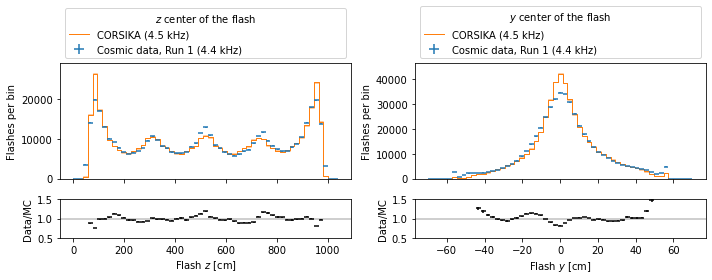

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols=2, sharex='col', figsize=(10,4), gridspec_kw = {'height_ratios':[3, 1]})
axes = [[axes[0][0], axes[1][0]], [axes[0][1], axes[1][1]] ]
fields = ['flash_z', 'flash_y']
lab = [r'$z$', r'$y$']
x_min = [0, -70]
x_max = [1040, 70]
N=55

for ax, field, l, xmin, xmax in zip(axes, fields, lab, x_min, x_max):
    data = [df_flash_mc_time[field], df_flash_data_time[field]]
    edges, edges_mid, bins, err, max_y = helper.histHelper(N, xmin, xmax, data, weights=[mc_scale,1])
    ax[0].step(edges_mid, bins[0], lw=1, label=mc_lab+' ({0:.1f} kHz)'.format(mc_rate), where='mid', color='C1')
    ax[0].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
    ax[0].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
                   zorder=3, label='Cosmic data, Run 1 ({0:.1f} kHz)'.format(data_rate))
    ax[0].set_ylabel("Flashes per bin")
    ax[0].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title=l+' center of the flash', loc='lower center', mode='expand')
    ax[0].set_ylim(0, max(max_y)*1.1)

    ratio = bins[1]/(bins[0])
    ratio_err = np.sqrt(1/bins[1]+1/ (bins[0]/mc_scale))*ratio
    ax[1].errorbar(edges_mid, ratio, xerr= edges[1:]-edges_mid, yerr=ratio_err, fmt='none', color='k')

    ax[1].axhline(y=1,color="k",alpha=0.25)
    ax[1].set_xlabel('Flash '+l+' [cm]')
    ax[1].set_ylabel("Data/MC")
    ax[1].set_ylim(0.5,1.5)
    
fig.tight_layout()    
fig.savefig(outdir+"flashxz.pdf")

In [21]:
# Calculate the ratio for other samples to see the differences:
file_name_mc_sce = './input/corsika_p_sce_30k.root'
file_name_mc_ddsce = './input/corsika_p_ddsce_8k.root'
file_name_mc_nosce = './input/corsika_p_nosce_6k.root'
file_name_mc_cmc = './input/corsika_cmc_sce_8k.root'
file_name_mc_con16 = './input/corsika_p_ddsce_con16_10k.root'
file_name_mc_con30 = './input/corsika_p_ddsce_con30_10k.root'

file_name_data1 = './input/extunbiased_run1.root'
file_name_data3 = './input/CosmicStudiesCRT_run3_48k_mcc9.root'

mc_keys       = ['sce', 'ddsce', 'nosce', 'cmc', 'reduced LArTF', 'increased LArTF']
mc_file_names = [file_name_mc_sce, file_name_mc_ddsce, file_name_mc_nosce, file_name_mc_cmc, file_name_mc_con16, file_name_mc_con30]
mc_files      = [uproot.open(f)[main_tree_name][flash_name].array('flash_time') for f in mc_file_names]
mc_entries    = [uproot.open(f)[main_tree_name]['Event'].numentries for f in mc_file_names]
mc_labs       = ['CORSIKA, simulated space charge    ',
                 'CORSIKA, data-driven space charge  ',
                 'CORSIKA, without space charge      ',
                 'CORSIKA+CMC, simulated space charge',
                 'CORSIKA, reduced LArTF building',
                 'CORSIKA, increased LArTF building']

In [22]:
for f,n, num_events in zip(mc_files,mc_labs, mc_entries):
    serie = pd.DataFrame(f, columns=['flash_time'])
    num_flash = serie.eval(time_query_mc).sum()
    rate = num_flash/(time_mc*num_events)
    R= rate
    rate_corr = fsolve(func, a_initial_guess)[0]
    err = 1/np.sqrt(num_flash)*mc_rate_corr
    print('{0:0.0f}+-{1:2.0f} '.format(rate_corr, err),n)

4641+- 6  CORSIKA, simulated space charge    
4642+-11  CORSIKA, data-driven space charge  
4604+-13  CORSIKA, without space charge      
5844+-10  CORSIKA+CMC, simulated space charge
4750+-10  CORSIKA, reduced LArTF building
4514+-10  CORSIKA, increased LArTF building


In [23]:
4750/4641

1.0234863176039646

In [24]:
4514/4641

0.9726352079293256

In [25]:
# Summing of syst error:
# Down -> lartf + light yield
down = np.sqrt(0.023**2+0.016**2)
# up -> propagation + threshold + lartf + light yield
up = np.sqrt(0.027**2+0.002**2+0.004**2+0.017**2)
print(down)
print(up)

0.028017851452243798
0.03221800738717402


In [26]:
# Summing of syst error:
# Down -> lartf + light yield
down = np.sqrt(0.016**2)
# up -> propagation + threshold + tartf + light yield
up = np.sqrt(0.002**2+0.004**2+0.017**2)
print(down)
print(up)

0.016
0.017578395831246946
